# Predicting the cost of used car

### Name - HRITIK DIXIT

### Group -  ML043B11      Batch - 3

### Email - hrixit43@gmail.com

**First we need to import the needed libraries to perform the specific set of tasks.**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)
cf.go_offline()

##### Plotly and cufflinks are used here to visualize more and to be clear.

In [4]:
expr = pd.read_excel('Data_Train.xlsx')

In [5]:
expr.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [6]:
expr.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [7]:
expr.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
expr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [9]:
expr.Location.nunique()
expr.Owner_Type.nunique()

4

In [10]:
expr.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [11]:
expr.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [6]:
expr.apply(lambda x: sum(x.isnull()),axis=0)

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

<font color='INDIANRED'>Since the dataset has approx 6000 Rows of data so dropping this much amount of values will not create much problem.</font>

In [7]:
expr.dropna(inplace= True)
expr.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [8]:
expr.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

### <font color='red'>Since the Mileage Power and Engine are a object type in the data set so firstly we will try to convert that object data type to a float data type for visualization and for our model also.</font>

In [9]:
expr['Mileage'] = expr['Mileage'].replace('km/kg', '',regex = True)

In [10]:
expr['Mileage'] = expr['Mileage'].replace('kmpl', '',regex = True)

In [11]:
expr.Mileage

0        26.6 
1       19.67 
2        18.2 
3       20.77 
4        15.2 
         ...  
6014     28.4 
6015     24.4 
6016     14.0 
6017     18.9 
6018    25.44 
Name: Mileage, Length: 5975, dtype: object

In [12]:
Mileage_Float = expr.Mileage.astype(float)
Mileage_Float

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 5975, dtype: float64

In [13]:
expr['Mileage_Float'] = Mileage_Float

In [14]:
expr.Mileage_Float

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage_Float, Length: 5975, dtype: float64

In [15]:
expr.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Mileage_Float']

In [16]:
expr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Mileage_Float      5975 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 653.5+ KB


In [17]:
del expr['Mileage']

In [18]:
expr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Engine             5975 non-null   object 
 8   Power              5975 non-null   object 
 9   Seats              5975 non-null   float64
 10  Price              5975 non-null   float64
 11  Mileage_Float      5975 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 606.8+ KB


In [19]:
expr['Engine'] = expr['Engine'].replace('CC', '',regex = True)

In [20]:
expr.Engine

0        998 
1       1582 
2       1199 
3       1248 
4       1968 
        ...  
6014    1248 
6015    1120 
6016    2498 
6017     998 
6018     936 
Name: Engine, Length: 5975, dtype: object

In [21]:
Engine_Float = expr.Engine.astype(float)
Engine_Float

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 5975, dtype: float64

In [22]:
expr['Engine_Float'] = Engine_Float

In [23]:
del expr['Engine']

In [24]:
expr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Power              5975 non-null   object 
 8   Seats              5975 non-null   float64
 9   Price              5975 non-null   float64
 10  Mileage_Float      5975 non-null   float64
 11  Engine_Float       5975 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 606.8+ KB


In [25]:
expr['Power'] = expr['Power'].replace('bhp', '',regex = True)

In [26]:
expr.Power

0       58.16 
1       126.2 
2        88.7 
3       88.76 
4       140.8 
         ...  
6014       74 
6015       71 
6016      112 
6017     67.1 
6018     57.6 
Name: Power, Length: 5975, dtype: object

In [27]:
Power_Float = expr.Power.astype(float)
Power_Float

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power, Length: 5975, dtype: float64

In [28]:
expr['Power_Float'] = Power_Float

In [29]:
del expr['Power']

In [30]:
expr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Seats              5975 non-null   float64
 8   Price              5975 non-null   float64
 9   Mileage_Float      5975 non-null   float64
 10  Engine_Float       5975 non-null   float64
 11  Power_Float        5975 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.8+ KB


Now we have our data set as a float values. 
Observed that in Power column and the Mileage column some of the values are zero. And if the values are zero no on will technically purchase a car which has Zero Mileage and Power. So Basically it is an outlier so we will remove it before moving to our data visualization.Since we have made this observation right now so dealing with them right now might be a good option.

# VISUAL SUMMARY OF THE DATASET

#### UNIVARIET ANALYSIS FIRST

In [31]:
sns.set_style('whitegrid')

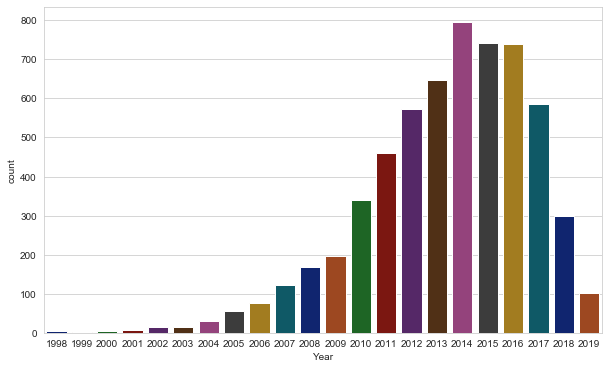

In [58]:
plt.figure(figsize = (10,6))
sns.countplot(expr['Year'],palette='dark')

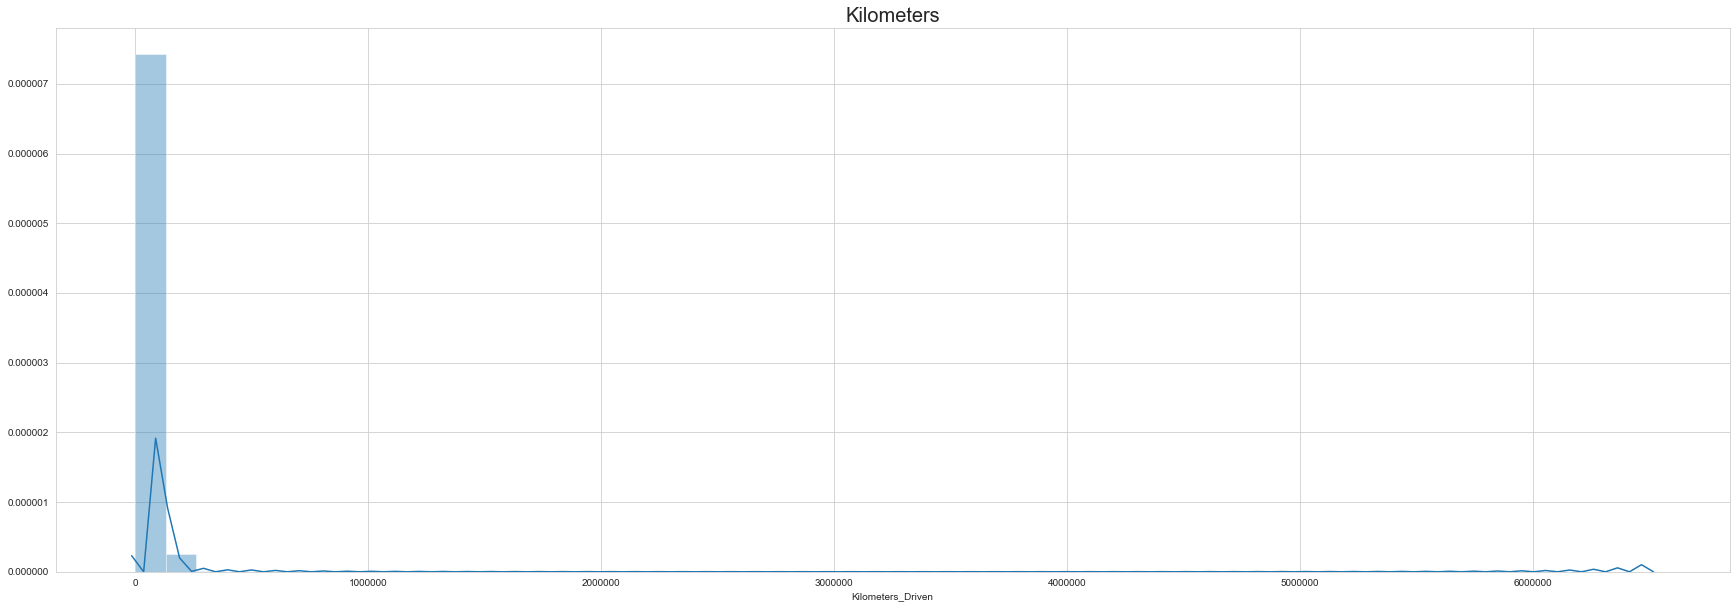

In [57]:
plt.rcParams['figure.figsize'] = (30,10)
sns.distplot(expr['Kilometers_Driven'])
plt.title("Kilometers",fontsize = 20)
plt.show()

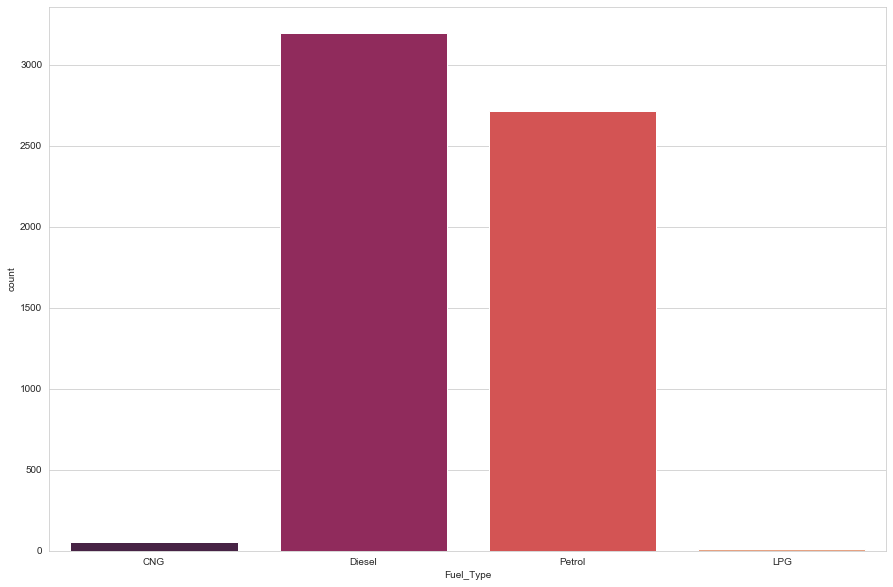

In [56]:
plt.figure(figsize = (15,10))
sns.countplot(expr['Fuel_Type'],palette= 'rocket')

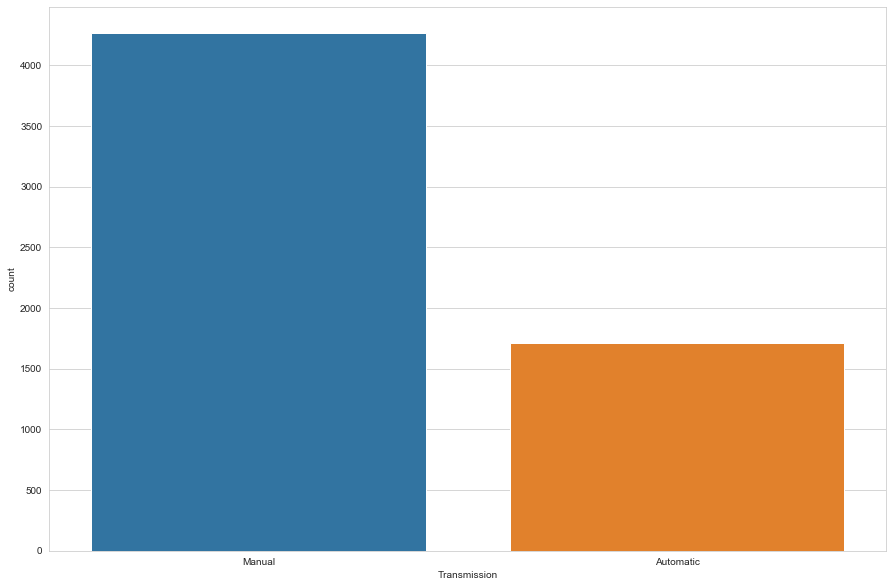

In [55]:
plt.figure(figsize = (15,10))
sns.countplot(expr['Transmission'])

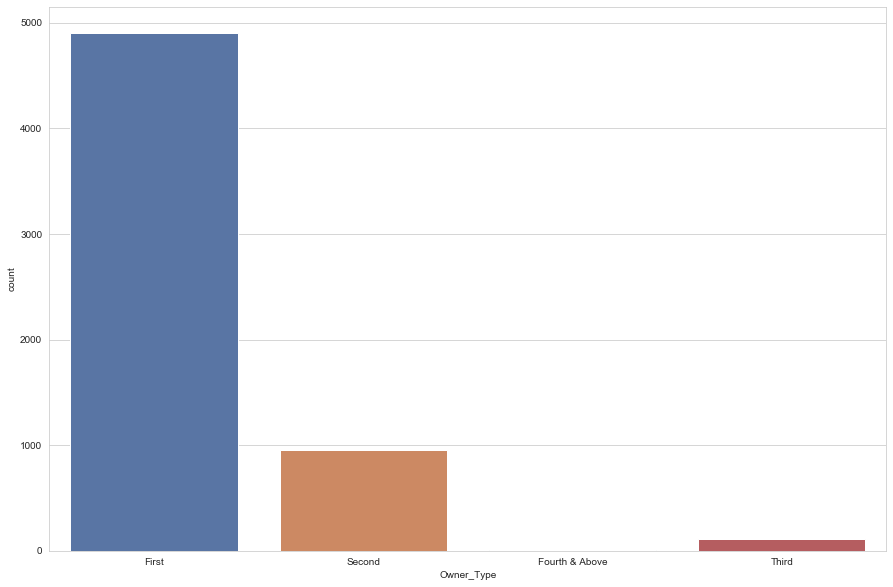

In [53]:
plt.figure(figsize = (15,10))
sns.countplot(expr['Owner_Type'],palette="deep")

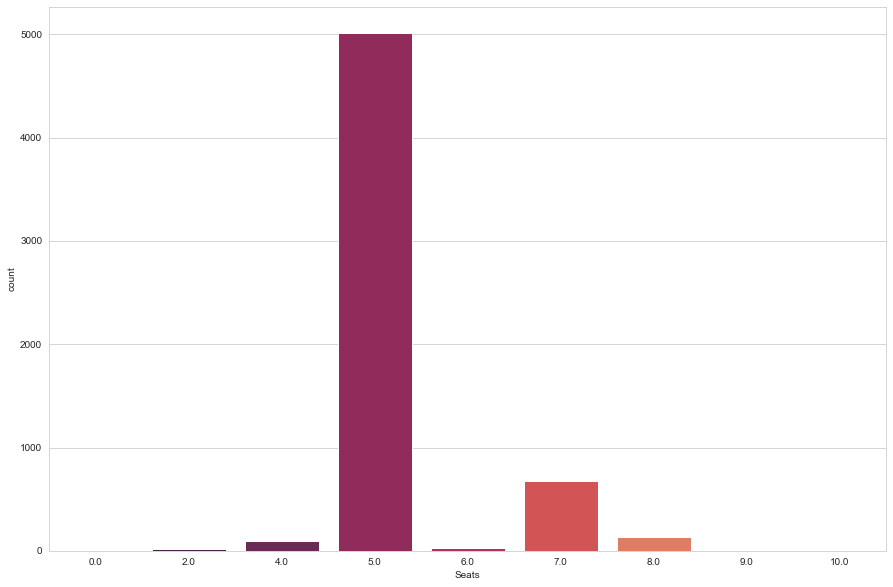

In [52]:
plt.figure(figsize = (15,10))
sns.countplot(expr['Seats'],palette= 'rocket')

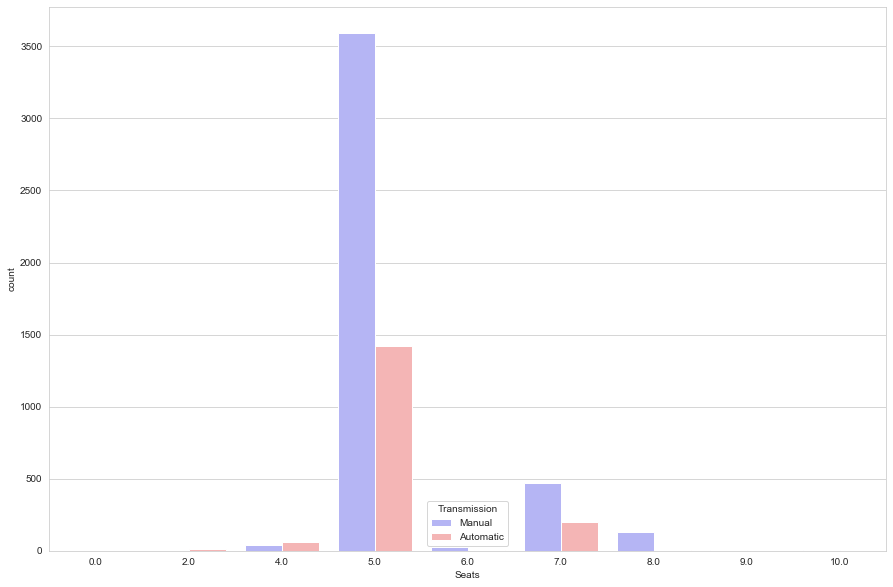

In [132]:
plt.figure(figsize = (15,10))
sns.countplot(x='Seats',hue='Transmission',palette= 'bwr',data =expr)

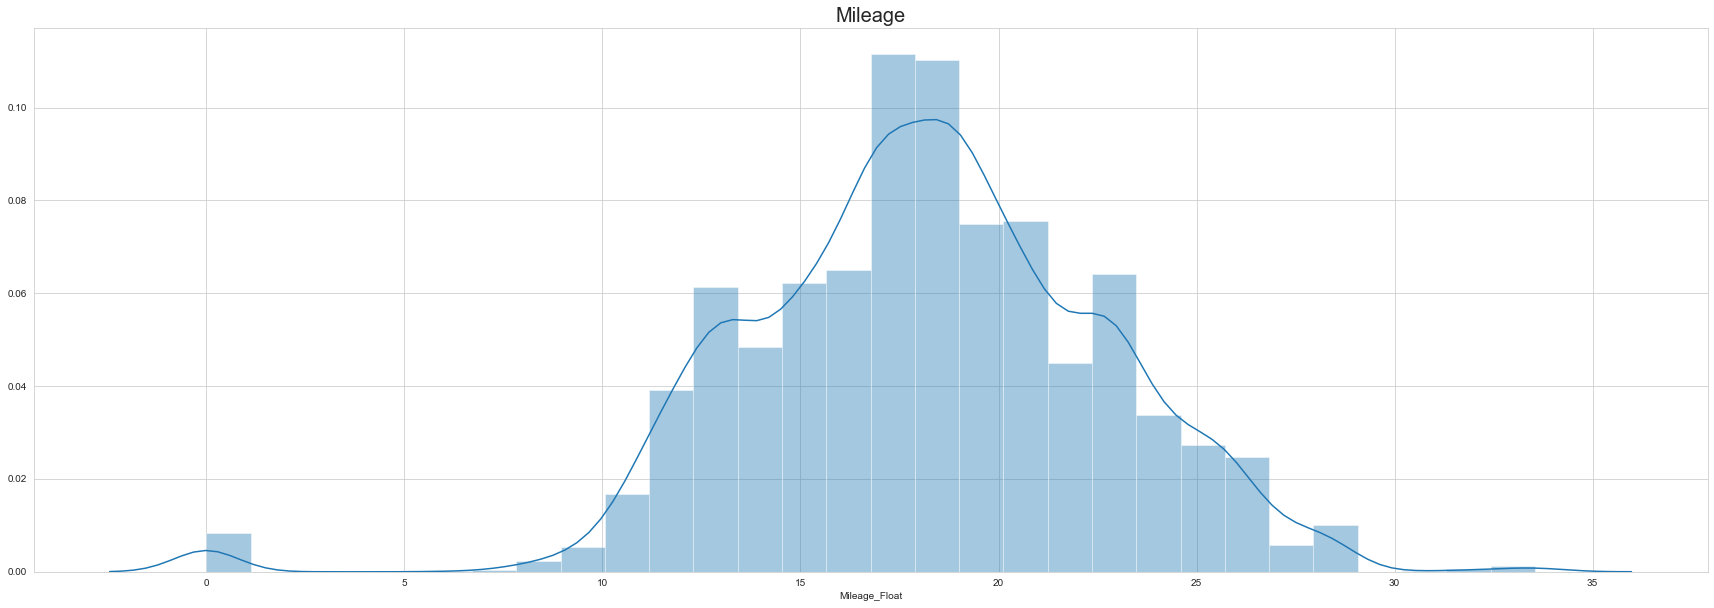

In [49]:
plt.rcParams['figure.figsize'] = (30,10)
sns.distplot(expr['Mileage_Float'],bins=30)
plt.title("Mileage",fontsize = 20)
plt.show()

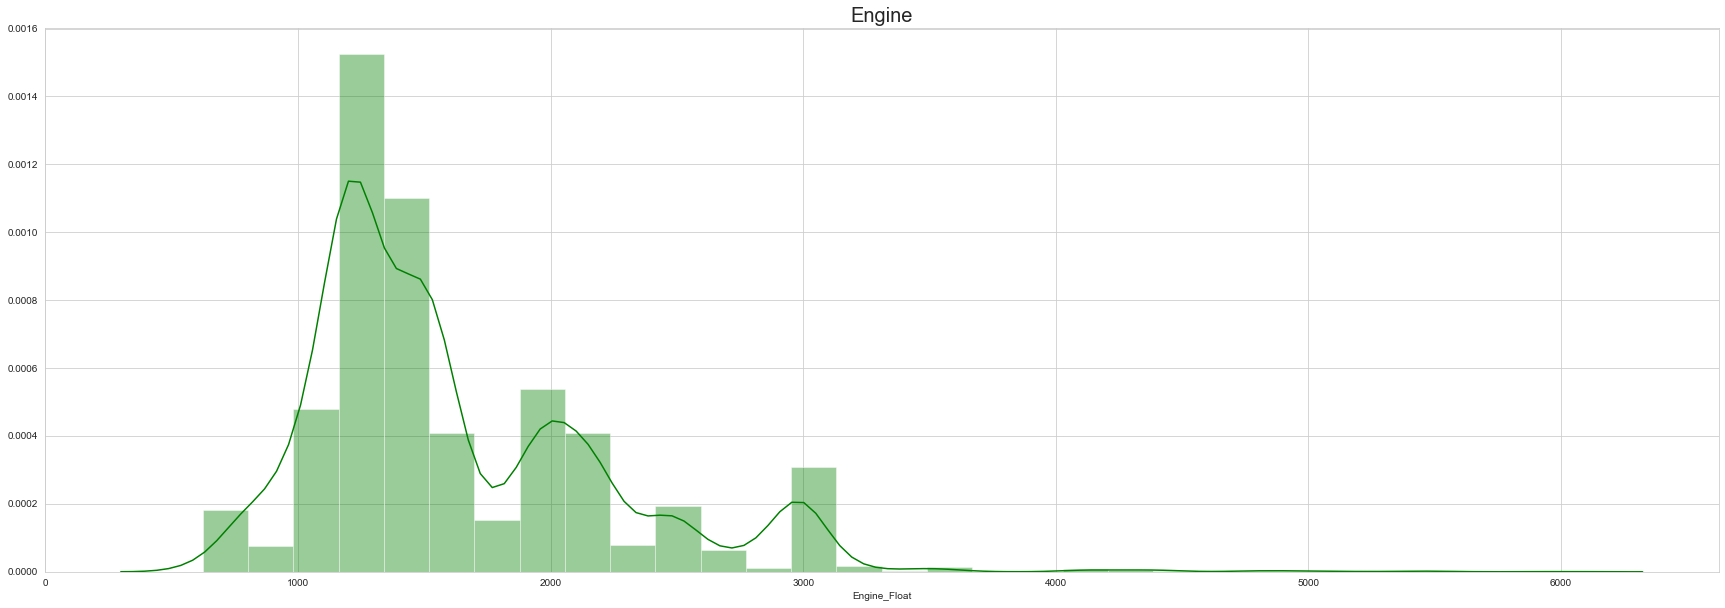

In [48]:
plt.rcParams['figure.figsize'] = (30,10)
sns.distplot(expr['Engine_Float'],bins=30,color ='g')
plt.title("Engine",fontsize = 20)
plt.show()

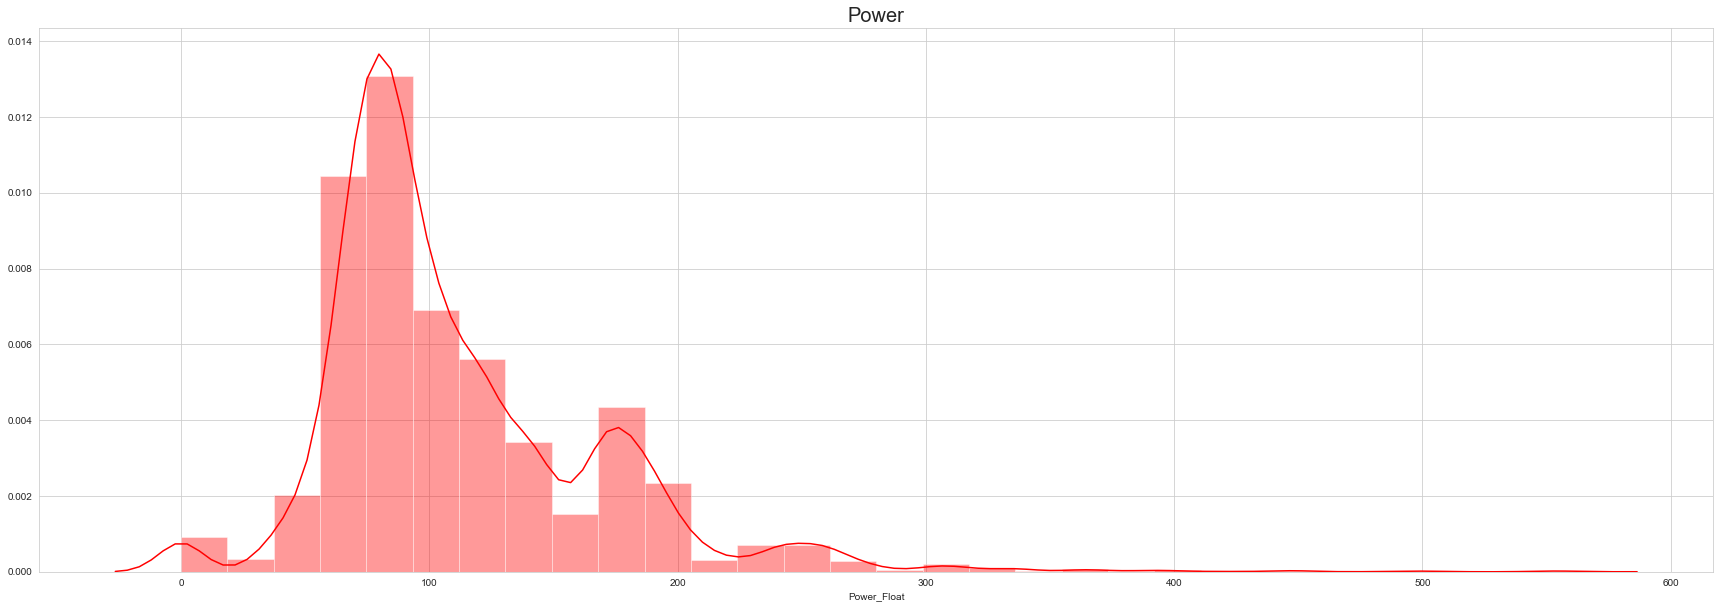

In [47]:
plt.rcParams['figure.figsize'] = (30,10)
sns.distplot(expr['Power_Float'],bins=30,color ='r')
plt.title("Power",fontsize = 20)
plt.show()

### Bivariet Analysis Now

In [32]:
expr.iplot(kind = 'bar', x= 'Year', y= 'Kilometers_Driven')

In [33]:
expr.iplot(kind = 'bar', x= 'Fuel_Type', y= 'Owner_Type',colors = '#079b91',xTitle = ' Fuel',yTitle = 'Owner')

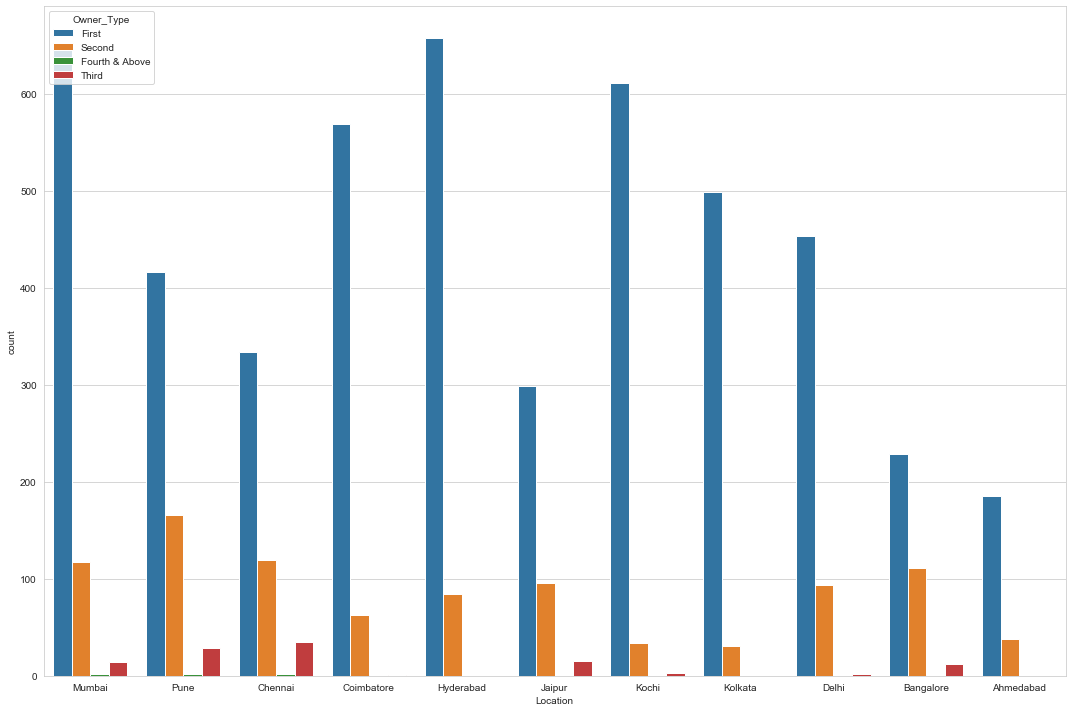

In [46]:
plt.figure(figsize = (15,10))
sns.countplot(x='Location',hue = 'Owner_Type',data = expr)
plt.tight_layout()

Text(0.5, 1.0, 'TRANSMISSION VS OWNER_TYPE')

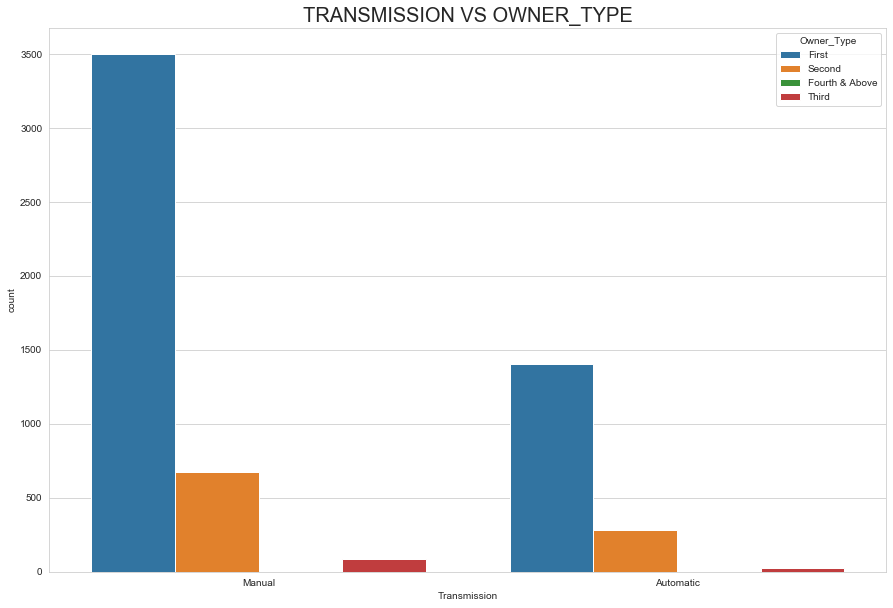

In [45]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'Transmission',hue = 'Owner_Type',data = expr)
plt.title('TRANSMISSION VS OWNER_TYPE',fontsize = 20)

Text(0.5, 1.0, 'FUEL VS SEATS')

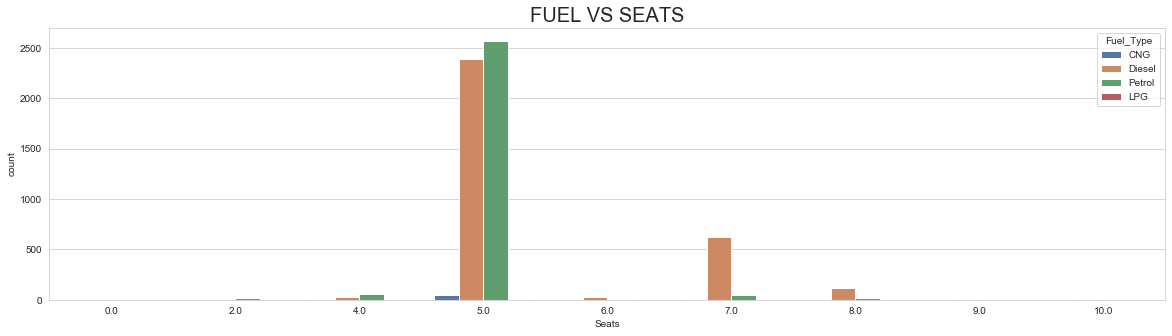

In [44]:
plt.figure(figsize= (20,5))
sns.countplot(x = 'Seats',hue = 'Fuel_Type',data = expr,palette = 'deep')
plt.title('FUEL VS SEATS',fontsize = 20)

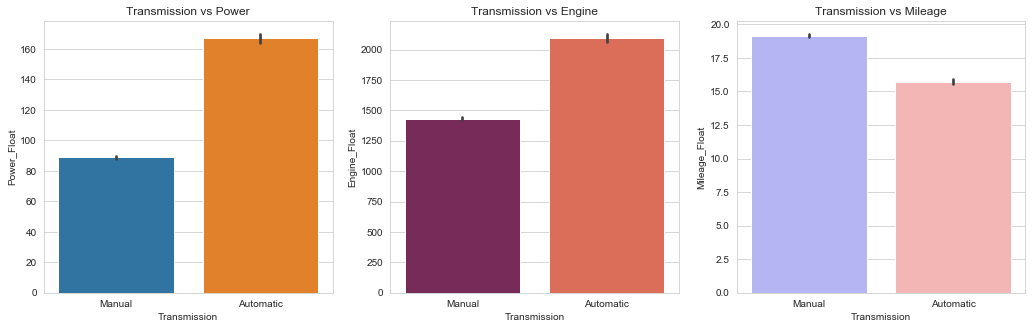

In [43]:
plt.figure(figsize= (30,5))
plt.subplot(151)
plt.title('Transmission vs Power')
sns.barplot(x ='Transmission',y = 'Power_Float',data = expr)
plt.subplot(152)
plt.title('Transmission vs Engine')
sns.barplot(x ='Transmission',y = 'Engine_Float',data = expr,palette= 'rocket')
plt.subplot(153)
plt.title('Transmission vs Mileage')
sns.barplot(x ='Transmission',y = 'Mileage_Float',data = expr,palette = 'bwr')

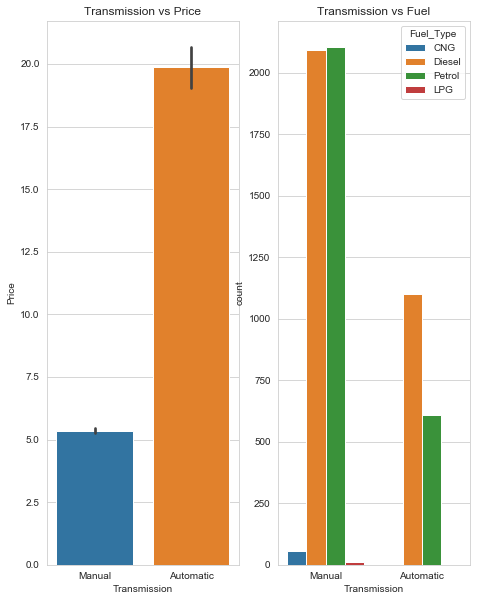

In [130]:
plt.figure(figsize= (20,10))
plt.subplot(151)
plt.title('Transmission vs Price')
sns.barplot(x ='Transmission',y = 'Price',data = expr)
plt.subplot(152)
plt.title('Transmission vs Fuel')
sns.countplot(x ='Transmission',hue = 'Fuel_Type',data = expr)

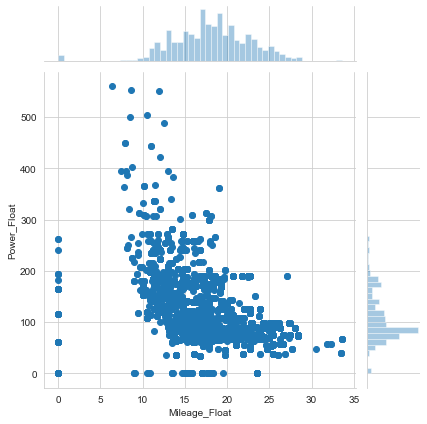

In [42]:
sns.jointplot(x ='Mileage_Float',y = 'Power_Float',data = expr)

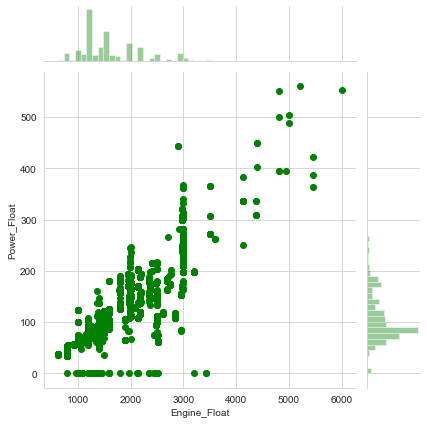

In [41]:
sns.jointplot(x ='Engine_Float',y = 'Power_Float',data = expr,color = 'g')

Text(0.5, 1.0, 'OWNER VS PRICE')

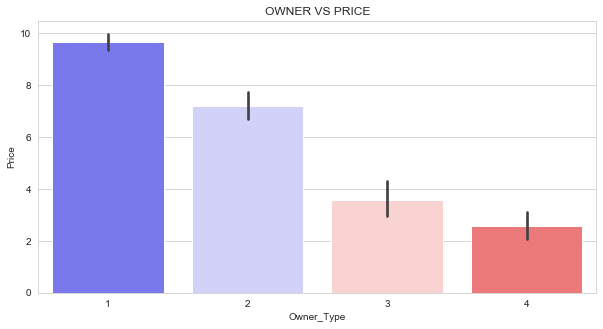

In [443]:
plt.figure(figsize = (10,5))
sns.barplot(x= 'Owner_Type',y = 'Price',data = expr,palette = 'bwr')
plt.title('OWNER VS PRICE')

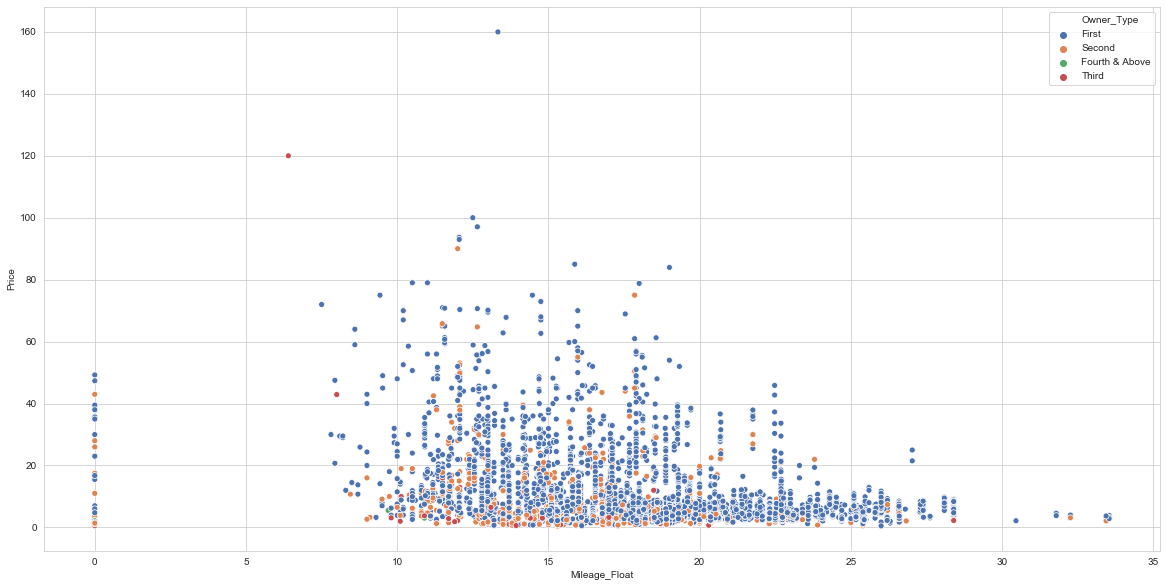

In [116]:
plt.figure(figsize = (20,10))
sns.scatterplot(x='Mileage_Float',y = 'Price',hue = 'Owner_Type',data = expr,palette = 'deep')

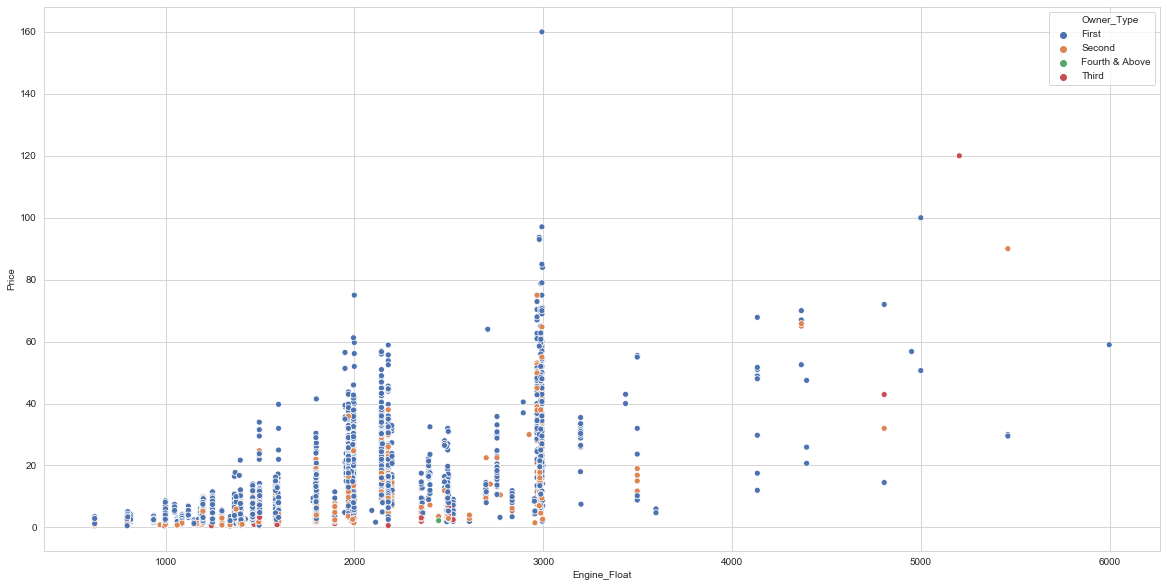

In [118]:
plt.figure(figsize = (20,10))
sns.scatterplot(x='Engine_Float',y = 'Price',hue = 'Owner_Type',data = expr,palette = 'deep')

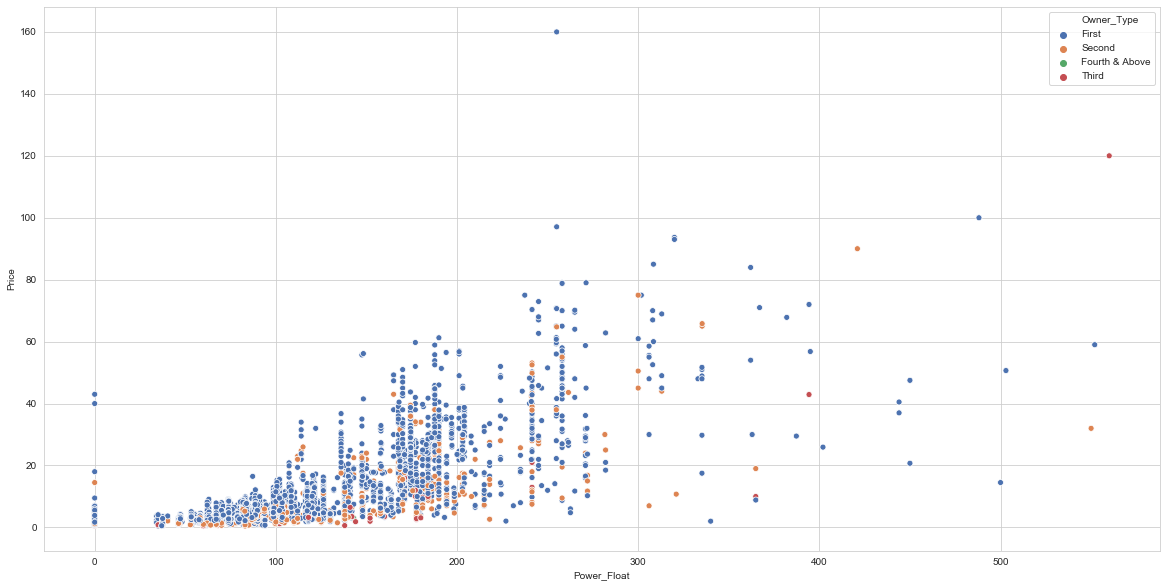

In [119]:
plt.figure(figsize = (20,10))
sns.scatterplot(x='Power_Float',y = 'Price',hue = 'Owner_Type',data = expr,palette = 'deep')

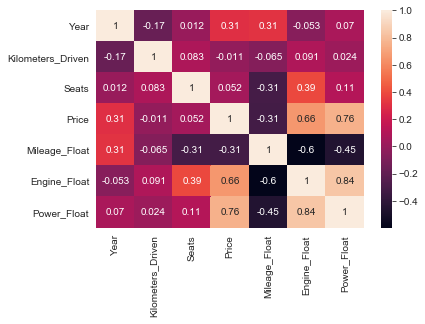

In [120]:
ex= expr.corr()
sns.heatmap(ex,annot = True)

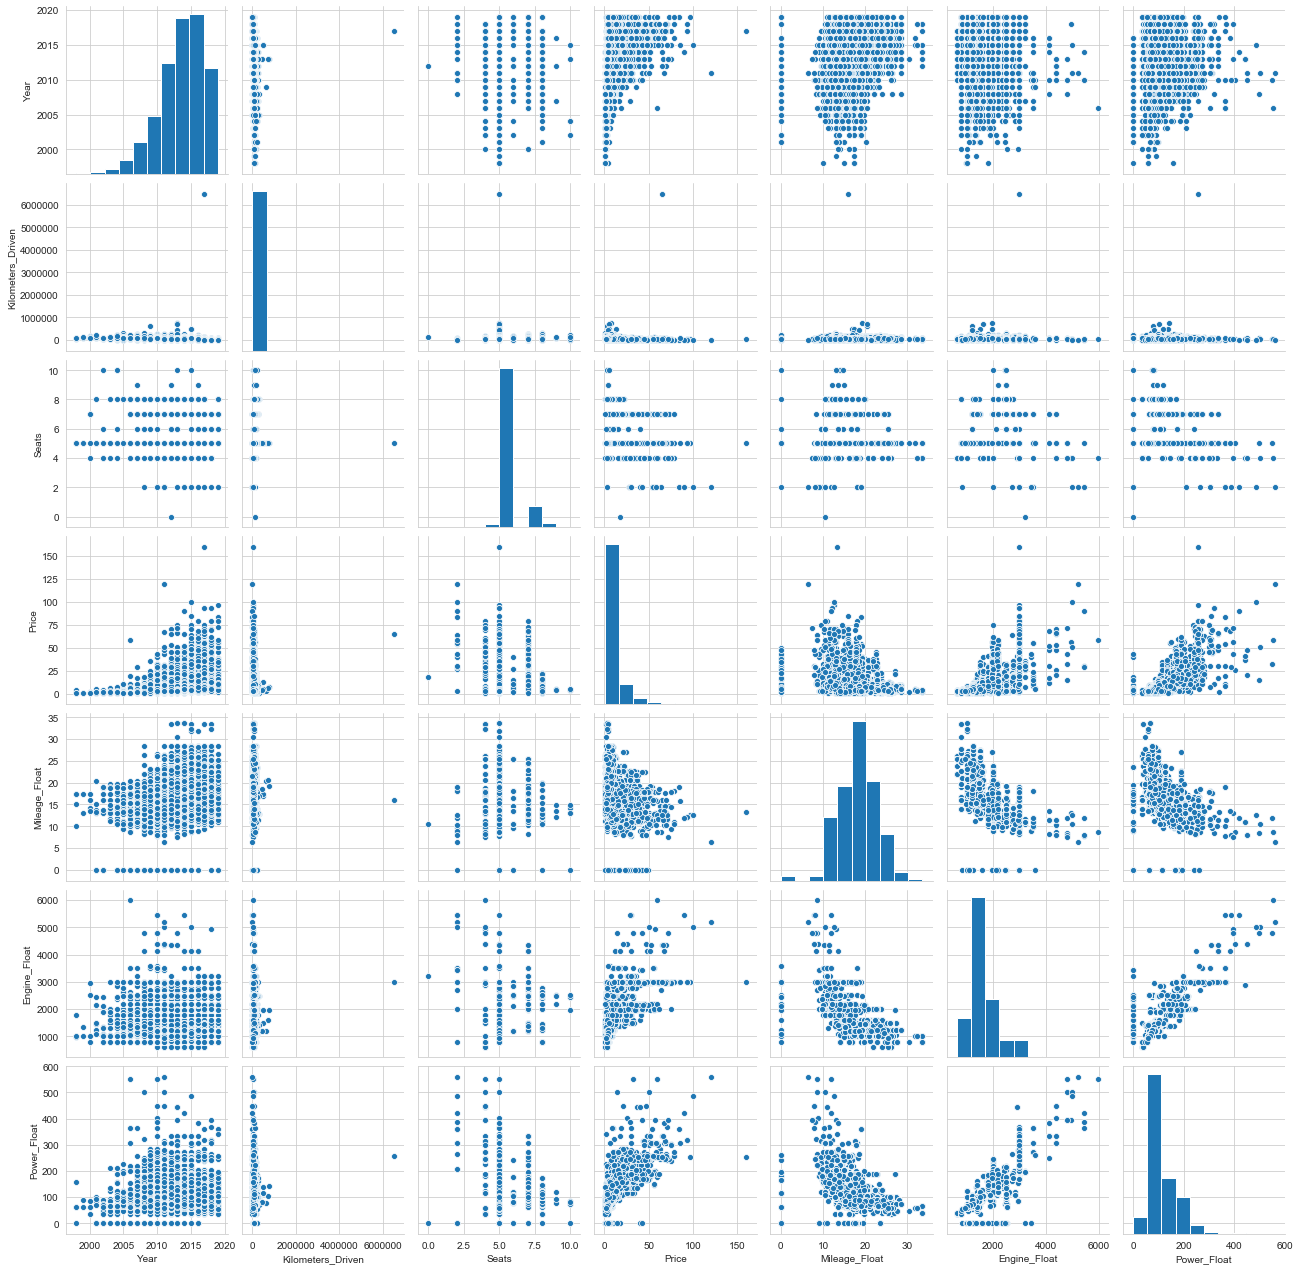

In [122]:
sns.pairplot(expr,palette='bwr')

## <font color='#b5ce14'>OBSERVATIONS:</font>

- 2014 Year based cars are more in number. And cars from year 2015 and 2016 are almost same.
- Diesel cars are more than petrol. LPG is negligble.
- 5 No. of seats are more then comes 7.
- Manual Transmission are more than automatic transmission.
- First Class Owner type are more than second then third and then fourth. Fourth and above is very less.
- Most Owner prefer manual transmission.
- Fuel Type of 5 seater are more because of more number of 5 seat type. In that also petrol type is more than diesel.
- LPG fuel type is negligble.
- Power of automatic type are more than manual.
- Engine of automatic type vehicles are more than manual.
- Mileage of manual type is more than automatic type.
- Price of automatic type transmission is more than manual.
- 1000-2000 cc capacity of engines are more.
- Price range is far more for first class owner type then any other type.
- 100-200 bhp power cars are more and has priced their cars between 60k.

### <font color='blue'>Inferences made from data visualization</font>

- Outliers present in Kilometers_Driven.
- Outliers present in Mileage and Power.
- Name, Location columns does not have any significant values in the dataset.
- Owners prefers manual type over automatic type because :
   - **Mileage is more in manual type transmission**.
   - **Price is less for manual type cars**.
- When it comes to performance automatic type cars performs better than manual cars.
- Manual cars are more than automatic cars.
- <font color='green'>**For models we need to clear the outliers first otherwise the model will not be accurate.**</font>

## Identification of outliers and removal.

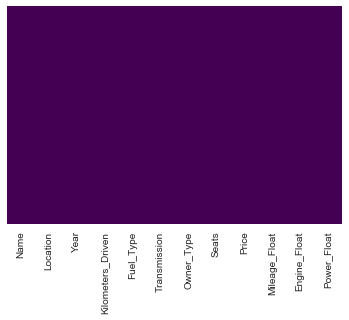

In [40]:
sns.heatmap(expr.isnull(),yticklabels=False,cbar= False,cmap = 'viridis')
#This indicates we dont have any null values.

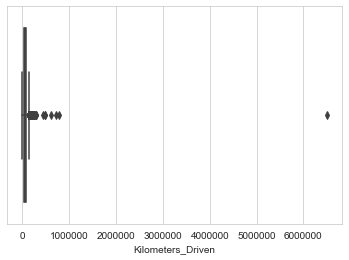

In [34]:
sns.boxplot(x ='Kilometers_Driven',data = expr)

Clearly it is visible that it contains a outlier.

In [35]:
Q1 = expr.Kilometers_Driven.quantile(0.25)
print(Q1)
Q3 = expr.Kilometers_Driven.quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
print(Q1 - (1.5 * IQR))
print(Q3 + (1.5 * IQR))

33908.0
73000.0
39092.0
-24730.0
131638.0


In [36]:
expr[~((expr.Kilometers_Driven < (Q1 - 1.5 * IQR)) |(expr.Kilometers_Driven > (Q3 + 1.5 * IQR)))].Kilometers_Driven.median()

52000.0

In [37]:
index = expr[(expr['Kilometers_Driven'] >= 1000000)].index
expr.drop(index, inplace=True)

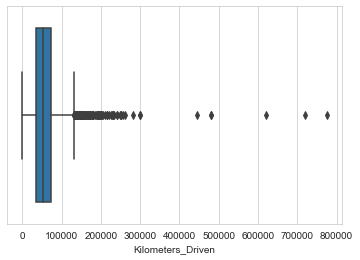

In [38]:
sns.boxplot(x ='Kilometers_Driven',data = expr)

Since now we can see more precision in outliers we can remove them as well.

In [39]:
index = expr[(expr['Kilometers_Driven'] >= 200000)].index
expr.drop(index, inplace=True)

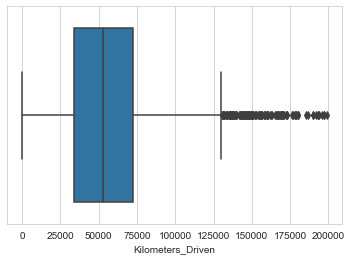

In [40]:
sns.boxplot(x ='Kilometers_Driven',data = expr)

These points cannot be considered as outliers now because they are more in number and removing it will cost accuracy of the dataset.

<font color='#004D40 '>**Now checking outliers from the Mileage column.**</font>

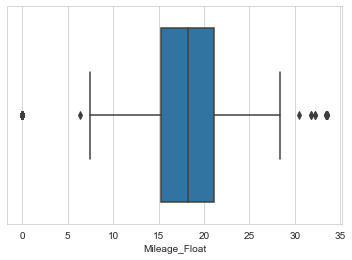

In [41]:
sns.boxplot(x ='Mileage_Float',data = expr)

In [42]:
index = expr[(expr['Mileage_Float'] <=10)].index
expr.drop(index, inplace=True)

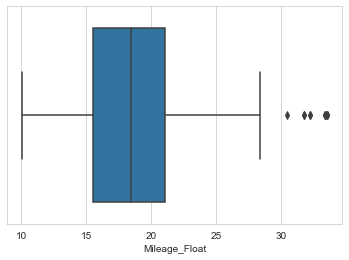

In [43]:
sns.boxplot(x ='Mileage_Float',data = expr)

In [44]:
index = expr[(expr['Mileage_Float'] >=25)].index
expr.drop(index, inplace=True)

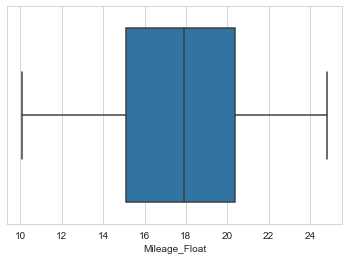

In [45]:
sns.boxplot(x ='Mileage_Float',data = expr)

Outliers are removed from the Mileage also.

<font color='#4A148C '>**Now checking outliers from Power Column.**</font>

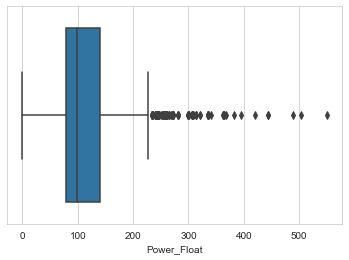

In [46]:
sns.boxplot(x ='Power_Float',data = expr)

In [47]:
Q1 = expr.Power_Float.quantile(0.25)
print(Q1)
Q3 = expr.Power_Float.quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
print(Q1 - (1.5 * IQR))
print(Q3 + (1.5 * IQR))

78.9
140.0
61.099999999999994
-12.749999999999986
231.64999999999998


In [48]:
expr[~((expr.Power_Float < (Q1 - 1.5 * IQR)) |(expr.Power_Float > (Q3 + 1.5 * IQR)))].Power_Float.median()

90.0

In [49]:
index = expr[(expr['Power_Float'] >=300)].index
expr.drop(index, inplace=True)

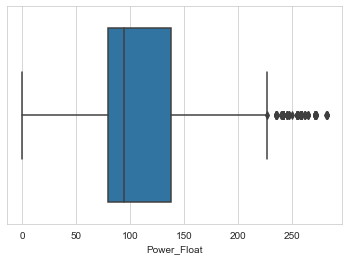

In [50]:
sns.boxplot(x ='Power_Float',data = expr)

In [51]:
index = expr[(expr['Power_Float'] >=260)].index
expr.drop(index, inplace=True)

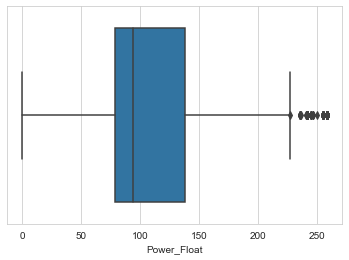

In [52]:
sns.boxplot(x ='Power_Float',data = expr)

If we want we can completely remove these outliers if we go in the range 230-250 but doing so will cost a large number of data points to go missing and will result in accuracy so we will keep it like this.

### <font color='#BF360C '>**Now we have removed the outliers so we can go for machine learning for model predictions.**</font>

# <font color='#37474F  '>MACHINE LEARNING ALGORITHMS FOR PREDICTIONS</font>


Since from the data visualization it was quite clear that the transmission column and owner type column is playing an important role in the dataset so we will have to consider it as well. But it is a **string based** column so we will create some dummy variable to satisfy the needs of a machine learning model as machine learning model does not understand the String based text.

In [53]:
cleanup_nums = {"Transmission":     {"Manual": 0, "Automatic": 1},
                "Owner_Type": {"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4},
                "Fuel_Type": {"Diesel": 1, "Petrol": 2, "CNG": 3, "LPG": 4},
               }

In [54]:
expr.replace(cleanup_nums, inplace=True)
expr.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_Float,Engine_Float,Power_Float
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,0,1,5.0,12.50,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,2,0,1,5.0,4.50,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,1,0,1,7.0,6.00,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,1,2,5.0,17.74,15.20,1968.0,140.80
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,4,0,1,5.0,2.35,21.10,814.0,55.20


In [55]:
expr.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Seats',
 'Price',
 'Mileage_Float',
 'Engine_Float',
 'Power_Float']

In [56]:
expr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5311 entries, 1 to 6017
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5311 non-null   object 
 1   Location           5311 non-null   object 
 2   Year               5311 non-null   int64  
 3   Kilometers_Driven  5311 non-null   int64  
 4   Fuel_Type          5311 non-null   int64  
 5   Transmission       5311 non-null   int64  
 6   Owner_Type         5311 non-null   int64  
 7   Seats              5311 non-null   float64
 8   Price              5311 non-null   float64
 9   Mileage_Float      5311 non-null   float64
 10  Engine_Float       5311 non-null   float64
 11  Power_Float        5311 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 539.4+ KB


**Now we will change the order of the dataframe so that the target column is at the last of the dataset. And also we will get rid of the useless column like name and location.**

In [57]:
expr = expr[['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Seats','Mileage_Float','Engine_Float','Power_Float','Price']]

In [58]:
expr.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_Float,Engine_Float,Power_Float,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,0,1,5.0,19.67,1582.0,126.20,12.50
2,Honda Jazz V,Chennai,2011,46000,2,0,1,5.0,18.20,1199.0,88.70,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,1,0,1,7.0,20.77,1248.0,88.76,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,1,2,5.0,15.20,1968.0,140.80,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,4,0,1,5.0,21.10,814.0,55.20,2.35


In [59]:
expr.drop('Name',axis=1,inplace = True)

In [60]:
expr.drop('Location',axis=1,inplace =True)

In [61]:
expr.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_Float,Engine_Float,Power_Float,Price
1,2015,41000,1,0,1,5.0,19.67,1582.0,126.20,12.50
2,2011,46000,2,0,1,5.0,18.20,1199.0,88.70,4.50
3,2012,87000,1,0,1,7.0,20.77,1248.0,88.76,6.00
4,2013,40670,1,1,2,5.0,15.20,1968.0,140.80,17.74
5,2012,75000,4,0,1,5.0,21.10,814.0,55.20,2.35


##### Now we will fit our data for the training and testing purpose.

In [62]:
X = expr[['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Seats','Mileage_Float','Engine_Float','Power_Float']]

In [63]:
y = expr['Price']

In [74]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state = 101)

### <font color='#922B21 '>**FIRST MODEL WE WILL APPLY IS LINEAR REGRESSION**</font>



In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lm = LinearRegression()

In [75]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
lm.coef_

array([ 7.19824676e-01, -3.52025184e-05, -2.82770065e+00,  3.16480285e+00,
       -4.48940259e-02, -8.41924044e-01, -1.68290615e-01,  2.41201350e-03,
        9.43691729e-02])

In [77]:
X_train.columns

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Seats', 'Mileage_Float', 'Engine_Float', 'Power_Float'],
      dtype='object')

In [78]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])

In [79]:
pred = lm.predict(X_test)

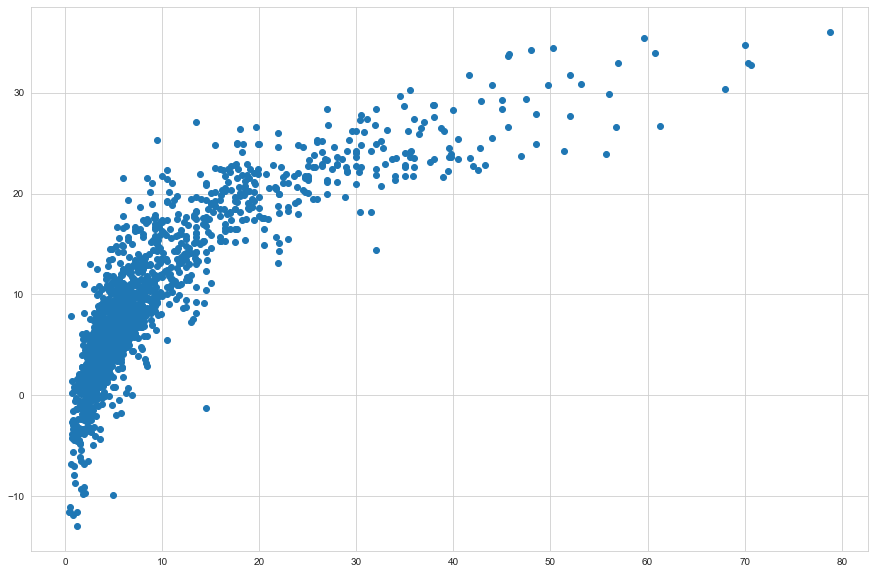

In [80]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,pred)


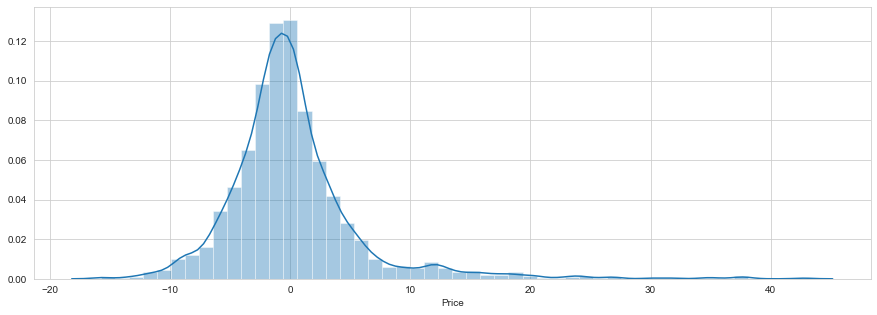

In [81]:
plt.figure(figsize = (15,5))
sns.distplot((y_test-pred))


In [82]:
from sklearn import metrics 

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.5997218932270134
MSE: 32.057123228268814
RMSE: 5.661901026004323


**By observation if we remove the year column the RMSE will change to 5.6 and with year it will change into 5.2.** 

### <font color='#1ABC9C'>**SECOND MODEL WILL BE DECISION TREE**</font>


In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X = expr.drop('Price',axis = 1)

In [161]:
y = expr['Price']

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 31)

In [171]:
from sklearn.tree import DecisionTreeRegressor

In [172]:
dtree = DecisionTreeRegressor()

In [173]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [174]:
pred = dtree.predict(X_test)

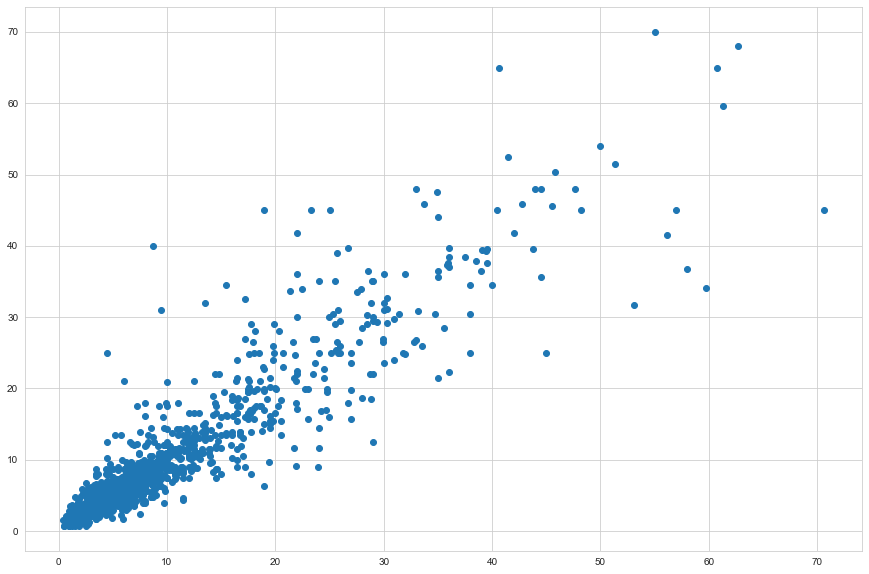

In [175]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,pred)

In [176]:
from sklearn import metrics

In [177]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.8820294855708908
MSE: 12.953050486198247
RMSE: 3.5990346603218826


### <font color='#27AE60  '>THIRD MODEL WILL BE RANDOM FOREST</font>

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
rfr = RandomForestRegressor(n_estimators=200)

In [180]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [181]:
rfr_pred = rfr.predict(X_test)

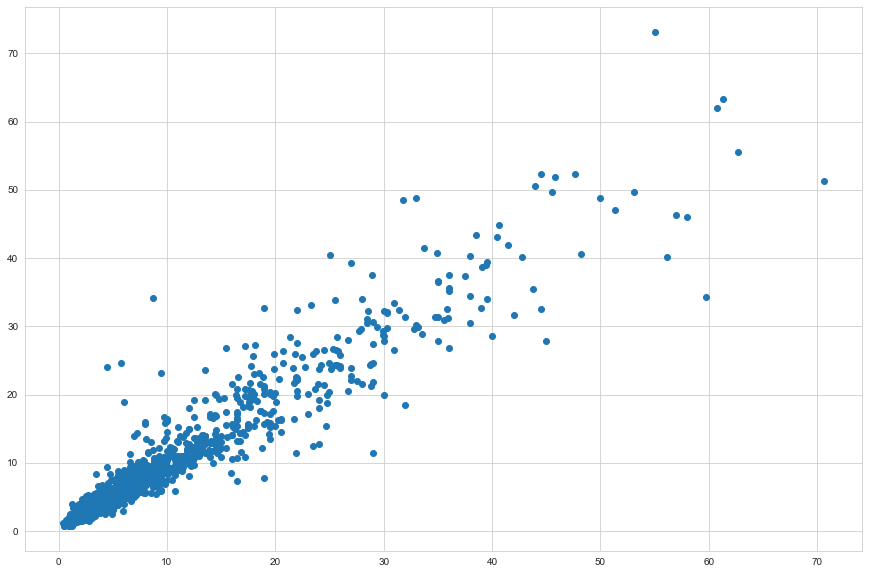

In [182]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,rfr_pred)

In [183]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 1.4615373080973295
MSE: 7.904102242315784
RMSE: 2.811423525959009


### <font color='#0c117a'>FOURTH MODEL WILL BE KNN</font>

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
scaler = StandardScaler()

In [186]:
scaler.fit(expr.drop('Price',axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [187]:
scaled_features = scaler.transform(expr.drop('Price',axis = 1))

In [188]:
expr_feat = pd.DataFrame(scaled_features,columns = expr.columns[:-1])

In [189]:
expr_feat.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_Float,Engine_Float,Power_Float
0,0.515031,-0.490386,-0.961120,-0.639630,-0.446039,-0.388354,0.519210,-0.050253,0.338978
1,-0.720857,-0.332682,0.982715,-0.639630,-0.446039,-0.388354,0.097054,-0.755699,-0.452550
2,-0.411885,0.960491,-0.961120,-0.639630,-0.446039,2.102645,0.835110,-0.665446,-0.451284
3,-0.102913,-0.500794,-0.961120,1.563403,1.778293,-0.388354,-0.764490,0.660718,0.647147
4,-0.411885,0.582001,4.870385,-0.639630,-0.446039,-0.388354,0.929880,-1.464828,-1.159649


In [190]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,expr['Price'],
                                                    test_size=0.30)

In [191]:
from sklearn.neighbors import KNeighborsRegressor

In [192]:
knn = KNeighborsRegressor(n_neighbors=1)

In [193]:
#Assuming the value of k =1

In [194]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [195]:
pred = knn.predict(X_test)

In [196]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.9256524466750313
MSE: 14.883871204516941
RMSE: 3.8579620532759185


In [197]:
#The RMSE here is 3.857 so we will try to find the best suited value for k so that the error becomes less.

In [198]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

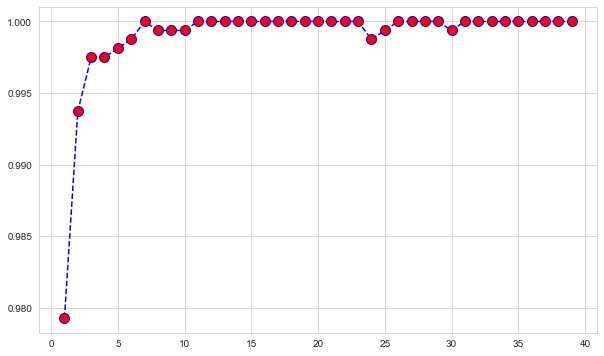

In [199]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = 'dashed',marker = 'o',markerfacecolor='red', markersize=10)

In [200]:
#By looking at the graph it is observed that the error will keep on increasing for higher values. So we will use k =3

In [201]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [202]:
pred = knn.predict(X_test)

In [203]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.8619719782517774
MSE: 13.611031193364003
RMSE: 3.6893131058997963


In [121]:
#RMSE changed from 3.85 to 3.68 which is not a big difference but anyways!

### <font color='#c95426'>FIFTH MODEL WILL BE SVM(SUPPORT VECTOR MACHINE)</font>

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X = expr.drop('Price',axis = 1)

In [124]:
y= expr['Price']

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [126]:
from sklearn.svm import SVR

In [127]:
model = SVR()

In [128]:
model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [122]:
predictions = model.predict(X_test)

In [123]:
from sklearn import metrics

In [124]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.770447571193602
MSE: 115.96697061162506
RMSE: 10.768796154242361


In [144]:
#The value of RMSE is not good at all we need to adjust the parameters of SVR like 'C' & 'gamma'

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [147]:
grid = GridSearchCV(SVR(),param_grid,verbose = 3)

In [148]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=0.1, gamma=1, score=-0.106, total=   1.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ..................... C=0.1, gamma=1, score=-0.120, total=   1.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] ..................... C=0.1, gamma=1, score=-0.103, total=   1.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ..................... C=0.1, gamma=1, score=-0.137, total=   1.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ..................... C=0.1, gamma=1, score=-0.134, total=   1.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................... C=0.1, gamma=0.1, score=-0.105, total=   1.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................... C=0.1, gamma=0.1, score=-0.119, total=   1.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................... C=0.1, gamma=0.1, score=-0.103, total=   1.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................... C=0.1, gamma=0.1, score=-0.136, total=   1.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.057, total=   1.7s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.064, total=   1.5s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.069, total=   1.6s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.052, total=   1.6s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.040, total=   1.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.115, total=   1.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.127, total=   1.7s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................. C=1000, gamma=0.001, score=0.156, total=   1.9s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.158, total=   2.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.268, total=   2.2s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.288, total=   3.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.213, total=   3.3s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.252, total=   2.6s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.206, total=   2.5s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [149]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [150]:
grid.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [151]:
grid_predictions = grid.predict(X_test)

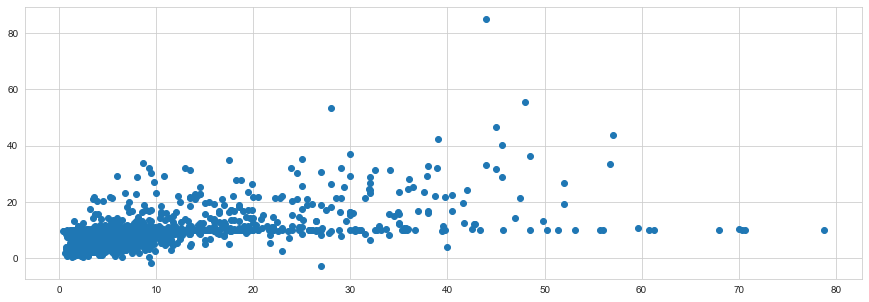

In [152]:
plt.figure(figsize = (15,5))
plt.scatter(y_test,grid_predictions)

In [153]:
print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

MAE: 5.128937863948183
MSE: 75.84739959293746
RMSE: 8.709041255668586


In [180]:
#The RMSE dropped to 2% by adjusting the best parameters so this is the best Support Vector Machine can do.

## Since our model is now trained its time to test our model.

In [64]:
data = pd.read_excel('Data_Test.xlsx')

<font color='#0c117a'>**Cleaning of data and modifying the testing data columns as we did for our training data for the accuracy score. If the indexes are not matched then the model will not be able to evaluate the accuracy score of the model.**</font>

In [65]:
data.dropna(inplace= True)
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [66]:
data['Mileage'] = data['Mileage'].replace('km/kg', '',regex = True)
data['Mileage'] = data['Mileage'].replace('kmpl', '',regex = True)
Mileage_Float = data.Mileage.astype(float)
data['Mileage_Float'] = Mileage_Float
del data['Mileage']

In [67]:
data['Engine'] = data['Engine'].replace('CC', '',regex = True)
data.Engine
Engine_Float = data.Engine.astype(float)
data['Engine_Float'] = Engine_Float
del data['Engine']

In [68]:
data['Power'] = data['Power'].replace('bhp', '',regex = True)
Power_Float = data.Power.astype(float)
data['Power_Float'] = Power_Float
del data['Power']

In [69]:
data = data[['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Seats','Mileage_Float','Engine_Float','Power_Float']]
data.drop('Name',axis=1,inplace = True)
data.drop('Location',axis=1,inplace =True)

In [70]:
cleanup_nums = {"Transmission":     {"Manual": 0, "Automatic": 1},
                "Owner_Type": {"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4},
                "Fuel_Type": {"Diesel": 1, "Petrol": 2, "CNG": 3, "LPG": 4},
               }

In [71]:
data.replace(cleanup_nums, inplace=True)
data.head()


,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_Float,Engine_Float,Power_Float
0,2014,40929,3,0,1,4.0,32.26,998.0,58.20
1,2013,54493,2,0,2,5.0,24.70,796.0,47.30
2,2017,34000,1,0,1,7.0,13.68,2393.0,147.80
3,2012,139000,1,0,1,5.0,23.59,1364.0,0.00
4,2014,29000,2,0,1,5.0,18.50,1197.0,82.85


<font color='#E6670F'>**Now our model is perfectly modified for testing purposes.**</font>


In [72]:
from sklearn.metrics import accuracy_score

In [86]:
train_data = expr
test_data = data

columns_of_interest = ['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Seats','Mileage_Float','Engine_Float','Power_Float']

x = train_data[columns_of_interest]
y = train_data.Price

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=0)

Price_model = RandomForestRegressor()
Price_model.fit(train_x, train_y)

val_predictions = Price_model.predict(val_x)

print(val_predictions)
testX= test_data[columns_of_interest]
test_predictions = Price_model.predict(testX)
print(test_predictions)
accuracy = Price_model.score(val_x,val_y)
print('\n')
print('accuracy is:' ,accuracy*100,'%')

[ 8.3406  1.6428  5.9463 ...  5.9363  5.362  37.5346]
[ 3.1784    2.3194   18.0129   ...  3.0806    4.3861   17.661825]


accuracy is: 92.93281845566814 %


# FINAL INFERENCES:
 -  **We are judging on the basis of root mean square error (RMSE), which measures the average deviation of the actual data points from the regression line.**
 - Linear Regression Model has a RMSE of 5.6619.
 - Decision Tree Model has a RMSE of 3.599.
 - Random Tree Model has a RMSE of 2.8114.
 - KNN Model has a RMSE of 3.769.
 - SVM Model has the RMSE of 8.71 with best parameters.

# <font color='#11A229   '>The Model Accuracy score is 92.93%</font>

## <font color='#0D5FA7 '>Random Forest is the right choice for this kind of dataset. Because it has the least RMSE which is required for a good prediction model.</font>

# THANKYOU!!